In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('C:\\Users\\USER\\Downloads\\titanic_dataset (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df.drop(['Name','Ticket'],axis =1, inplace =True)

# Pre - Processing

In [39]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

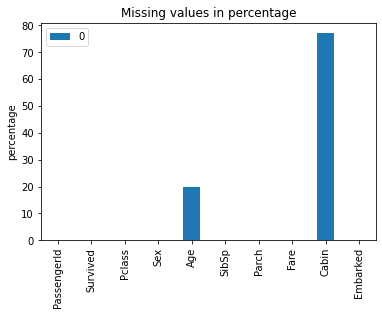

In [40]:
miss_value=pd.DataFrame(df.isna().sum()/len(df) *100)
miss_value.plot(kind="bar",title="Missing values in percentage", ylabel='percentage')
plt.show()

In [41]:
df.drop("Cabin",axis=1,inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

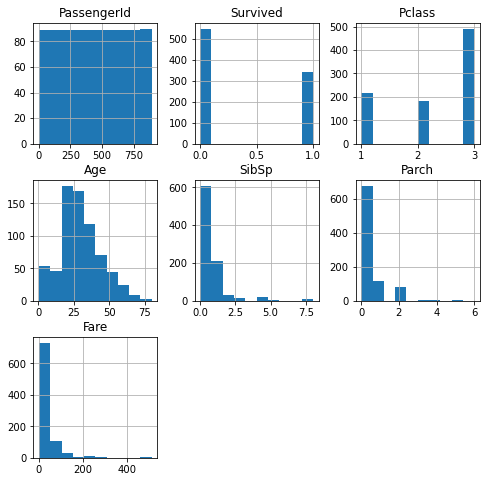

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Figure size 432x288 with 0 Axes>

In [42]:
#Checking skewness
num_data=df.select_dtypes(exclude="object")
num_data.hist(figsize=(8,8))
plt.show()
plt.tight_layout()
num_data.columns

In [43]:
#Use median to fill in
from sklearn.impute import SimpleImputer

def get_parameters(df):
    parameters={}
    for i in df.columns[df.isnull().any()]:
        if df[i].dtype=="int64" or df[i].dtype=="float64":
            strategy="median"
        else:
            strategy="most_frequent"
        missing_values=df[i][df[i].isnull()].values[0]
        parameters[i]={"missing_values":missing_values,"strategy":strategy}
    return parameters
get_parameters(df)

{'Age': {'missing_values': nan, 'strategy': 'median'},
 'Embarked': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [44]:
cols=["Age","Embarked"]
parameters=get_parameters(df)
for col,param in parameters.items():
    missing_values=param["missing_values"]
    strategy=param["strategy"]
    imp=SimpleImputer(missing_values=missing_values,strategy=strategy)
    df[col]=imp.fit_transform(df[[col]])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

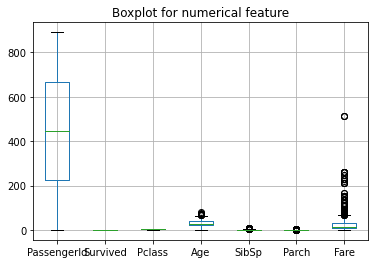

In [45]:
#Check for the outliers
nume_data.boxplot()
plt.title("Boxplot for numerical feature")
num_data.columns

In [46]:
#Handling of outliers in Age
cols=['Age', 'SibSp', 'Parch', 'Fare']
Q1=np.percentile(df["Age"],25,interpolation="midpoint")
Q2=np.percentile(df["Age"],50,interpolation="midpoint")
Q3=np.percentile(df["Age"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
df.loc[df["Age"] <low_lim,"Age"] = low_lim
df.loc[df["Age"] >up_lim,"Age"] = up_lim

In [47]:
#Handling of outliers in SibSp
Q1=np.percentile(df["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(df["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(df["SibSp"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
df.loc[df["SibSp"] <low_lim,"SibSp"] = low_lim
df.loc[df["SibSp"] >up_lim,"SibSp"] = up_lim

In [48]:
#Handling of outliers in Parch
Q1=np.percentile(df["Parch"],25,interpolation="midpoint")
Q2=np.percentile(df["Parch"],50,interpolation="midpoint")
Q3=np.percentile(df["Parch"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
df.loc[df["Parch"] <low_lim,"Parch"] = low_lim
df.loc[df["Parch"] >up_lim,"Parch"] = up_lim

In [49]:
# Encoding the catetgorical colum 
df["Sex"]=pd.get_dummies(df["Sex"],drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1.0,0,7.2500,S
1,2,1,1,0,38.0,1.0,0,71.2833,C
2,3,1,3,0,26.0,0.0,0,7.9250,S
3,4,1,1,0,35.0,1.0,0,53.1000,S
4,5,0,3,1,35.0,0.0,0,8.0500,S


In [50]:
df=pd.get_dummies(df, columns=['Embarked'],drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1.0,0,7.2500,0,1
1,2,1,1,0,38.0,1.0,0,71.2833,0,0
2,3,1,3,0,26.0,0.0,0,7.9250,0,1
3,4,1,1,0,35.0,1.0,0,53.1000,0,1
4,5,0,3,1,35.0,0.0,0,8.0500,0,1


<AxesSubplot:>

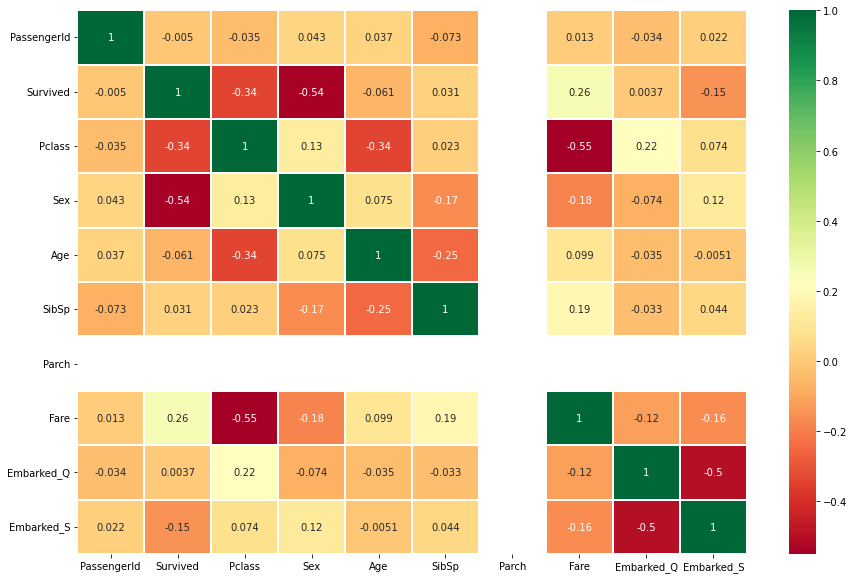

In [51]:
corrmatrix=df.corr()
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,linewidths=0.2,cmap='RdYlGn',annot=True)

In [53]:
df.drop(["Age","SibSp","Parch"],axis=1,inplace=True)

In [55]:
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import scipy.stats as stats

In [56]:
y=df['Survived']
x=df.drop("Survived", axis=1)
# Splitting data into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape
x_test.shape

(179, 6)

In [57]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [58]:
rdm=RandomForestClassifier()
rdm.fit(x_train,y_train)
feat_importances=pd.Series(rdm.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feat_importances

PassengerId    34.019630
Fare           28.090588
Sex            25.903118
Pclass          9.155232
Embarked_S      2.017117
Embarked_Q      0.814315
dtype: float64

In [63]:
feat_importances.nlargest(4).index
new_feature=['Pclass', 'Sex', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Travelled_Alone']
for k in cols:
    if k not in new_feature:
        df.drop(df,axis=1,inplace=True)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Modeling

Text(0.5, 1.0, 'Accuracy for differnet K value')

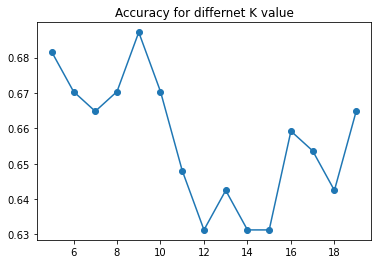

In [65]:
# Finding the best vaue of n_neighbors in KNN
n_nghbr=[]
lim=np.arange(5,20)

for i in lim:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accur=accuracy_score(y_test,y_pred)
    n_nghbr.append(accur)
plt.plot(lim,n_nghbr,'-o')
plt.title("Accuracy for differnet K value")

In [69]:
# since its is Classification data, We can gor for Classifier algorithms
Model={
    'Logistic Regression':LogisticRegression(),
    'KNN Classifier':KNeighborsClassifier(n_neighbors=6, metric="minkowski"),
    'Random Forest Classifier':RandomForestClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    'support vector': SVC(),
    'BernoulliNB':BernoulliNB()   
}

In [70]:
result={}

for name,model in Model.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc

In [74]:
result

{'Logistic Regression': 0.776536312849162,
 'KNN Classifier': 0.6703910614525139,
 'Random Forest Classifier': 0.8156424581005587,
 'Decision Tree Classifier': 0.7430167597765364,
 'Gradient Boosting Classifier': 0.8212290502793296,
 'support vector': 0.5977653631284916,
 'BernoulliNB': 0.7821229050279329}

In [73]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [77]:
ypred = clf.predict(x_test)
confusion_matrix(ypred, y_test), f1_score(ypred, y_test)

(array([[84, 19],
        [21, 55]], dtype=int64),
 0.7333333333333334)